In [1]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25' 
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib inline

In [2]:
# Replace this variable accordingly 
path_to_results = "../../experiments/BiVar/2018-11-17-10-47_BiVarPowerN_/"

In [3]:
data = pandas.read_csv(path_to_results + "BiVarPowerN.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [5]:
data['n'].unique()

array([ 100,  200,  500, 1000])

In [6]:
data["testId"].unique()

array(['Kendalls Tau', 'HoeffdingsD', 'MWPr', 'KS', 'MWPu', 'MWP',
       'Slope Inversion', 'Distance Correlation', 'Correlation',
       'Mutual Information', 'Jensen Shannon Equity Width', 'Slope',
       'Spearman Correlation', 'MCE', 'HSM'], dtype=object)

In [7]:
data["nDim"].unique()

array([2])

In [8]:
data["M"].unique()

array([nan, 50.])

In [9]:
data["n"].unique()

array([ 100,  200,  500, 1000])

In [10]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [11]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [12]:
# selected tests are all beside MWPu & MWPr
selectedTestDict = {
    "Correlation" : "Cor", 
    "Mutual Information" : "MI", 
    "Jensen Shannon Equity Width" : "EW",
    "Distance Correlation" : "DCor", 
    "Slope" : "S", 
    "Slope Inversion" : "SI", 
    "Kendalls Tau" : "Tau", 
    "Spearman Correlation" : "SCor", 
    "MCE" : "MCE", 
    "MWP" : "MWP", 
    "KS" : "KS", 
    "HoeffdingsD" : "HD", 
    "HSM" : "HSM"
}

In [13]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData = selectedData[[str(x) not in ["MWPu", "MWPr"] for x in selectedData["testId"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]
selectedData["testId"] = [selectedTestDict[x] for x in selectedData["testId"]]

## Checking up w.r.t n for each approach

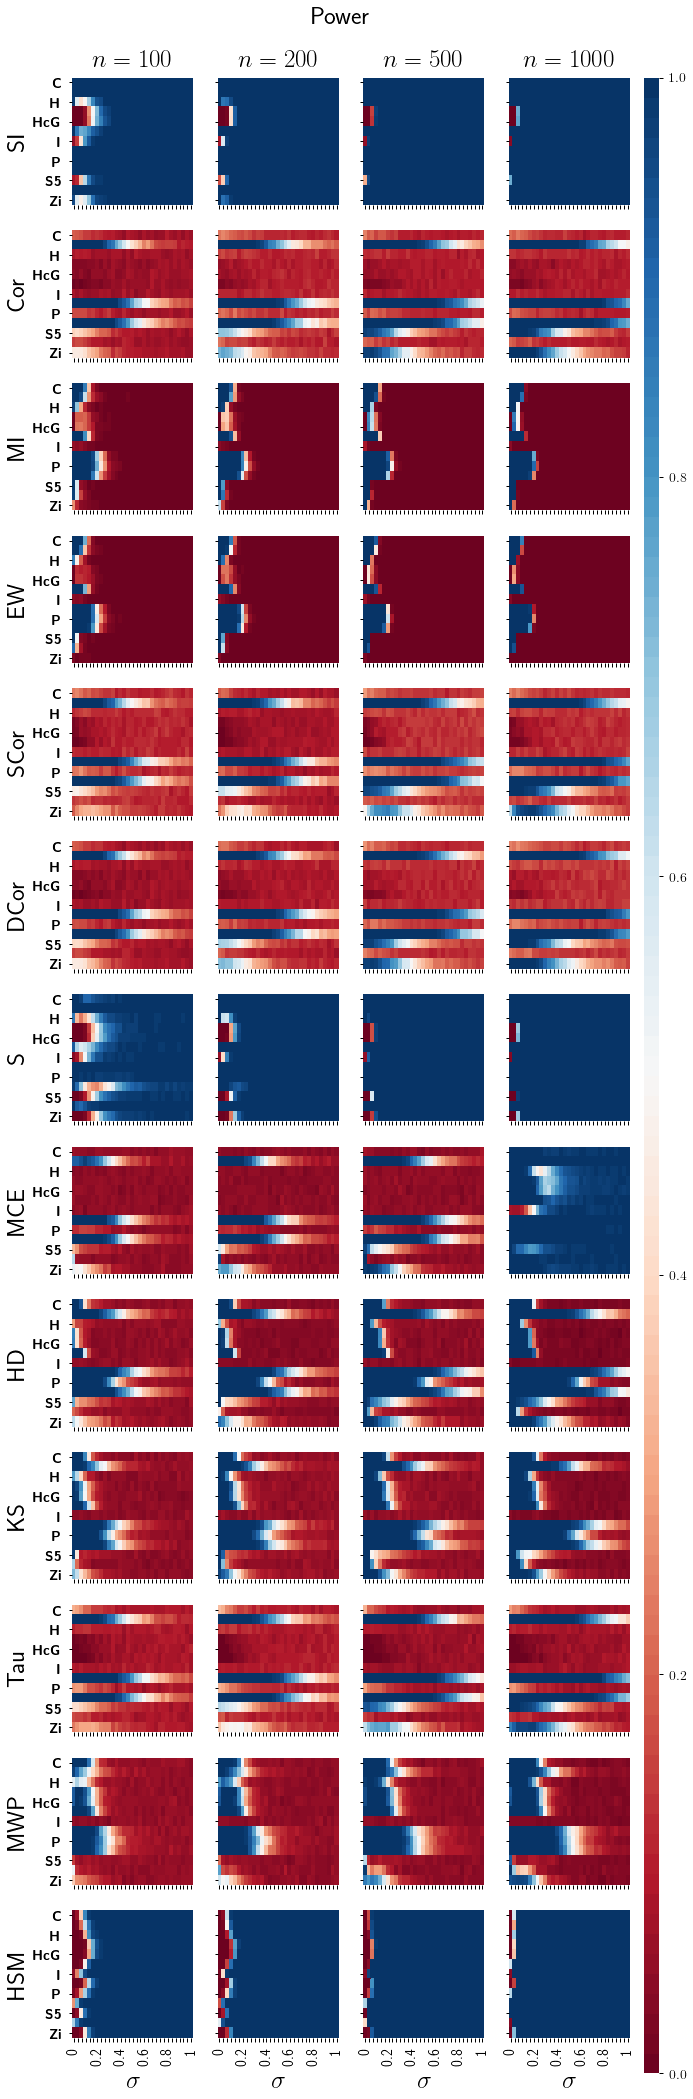

In [14]:
nDim=2

fig, axes = plt.subplots(nrows=13, ncols=4, figsize=(10,33), sharey=True, sharex=True)
cbar_ax = fig.add_axes([.92, 0.11, .02, 0.84])
axess = axes.reshape(-1)

for j,test in enumerate(selectedData["testId"].unique()):
    measure = "powerAt95"

    for i, N in enumerate([100,200,500,1000]):
        subdata = selectedData[(selectedData["testId"] == test) & (selectedData["n"] == N)]
        d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "category"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        ax = axess[j*4+i]

        sns.heatmap(dd, vmin=0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)],
                    cbar=i == 0, cbar_ax=None if (j!=0 and i!=0) else cbar_ax)
        
        ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

        if(j ==0):
            ax.set_title(r'$n = %s$'%(N), y=1.04)
        else: 
            ax.set_title("")
        ax.set_ylabel("")

        sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
        ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
        if(j == len(selectedData["testId"].unique())-1): 
            ax.set_xlabel(r'\sigma', y=-0.5)
        else:
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(r'%s'%test)

    plt.suptitle('Power', fontsize=25)

fig.subplots_adjust(top=0.95)

fig.savefig("plots/BiVar_N_all.pdf")

## Fig 8: Average score w.r.t. n, \sigma = 1/30

In [70]:
d = selectedData[(selectedData["testId"]=="MWP") & 
                     (selectedData["noise"]==noise) &
                     (selectedData["n"]<=maxn) &
                     (selectedData["nDim"]==2)].groupby(["n", "category"])
means = d.mean()
means = means.reindex(
    ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"], level="category")

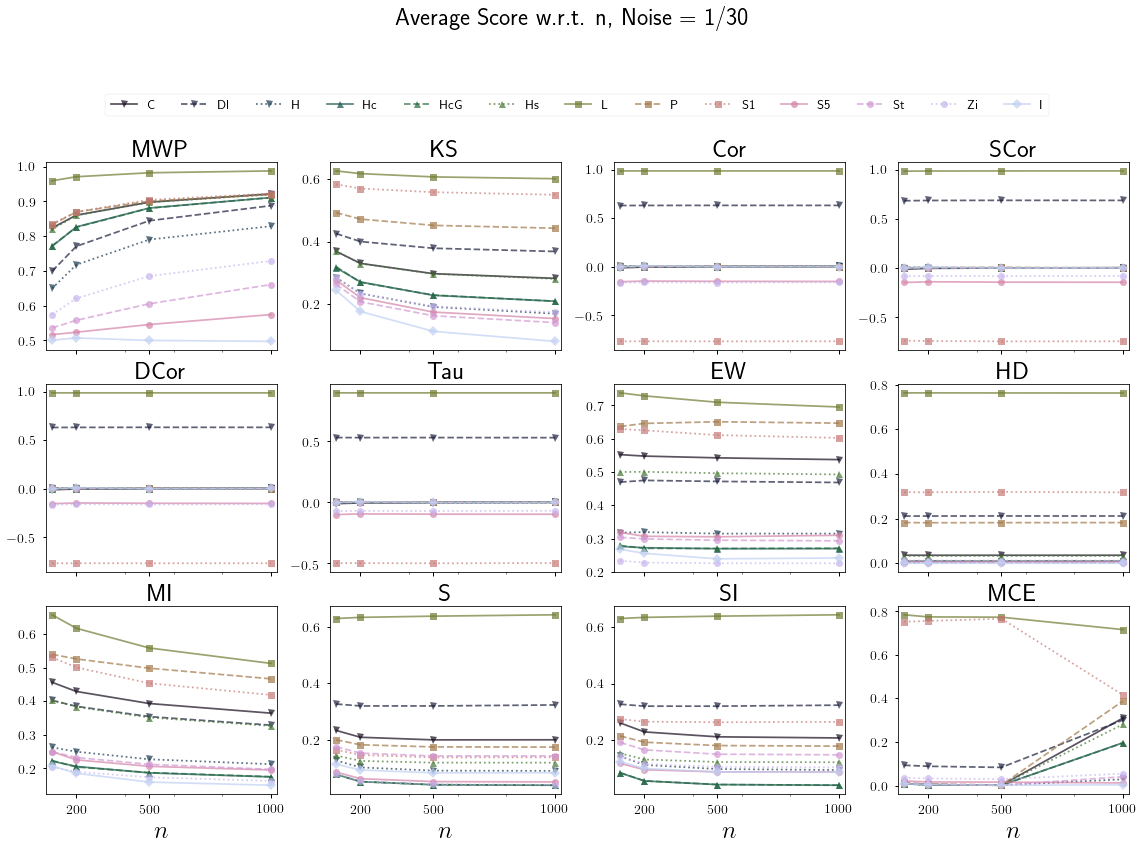

In [15]:
monochrome=((cycler('marker', ['v', '^', 's', 'o', "D"]) * (cycler('linestyle', ['-', '--', ':']))) + 
            cycler('color', sns.color_palette("cubehelix", 15)) )

noise = 1/30
maxn = 1000

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12), sharex=True)
axess = axes.reshape(-1)

fig.suptitle("Average Score w.r.t. n, Noise = 1/30", size = 24)

for ax in axess:
    ax.set_prop_cycle(monochrome)

testlist = ['MWP', 'KS', 'Cor', 'SCor', 'DCor', 'Tau', 'EW', 'HD', 'MI', 'S', 'SI', 'MCE']
for i,test in enumerate(testlist):
    d = selectedData[(selectedData["testId"]==test) &  
                     (selectedData["noise"]==noise) &
                     (selectedData["n"]<=maxn) &
                     (selectedData["nDim"]==2)].groupby(["n", "category"])
    means = d.mean()
    means = means.reindex(
        ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"], level="category")
    #errors = d.std()
    ax = means.unstack().plot(y="avgContrast", ax=axess[i], alpha=0.7)#, yerr="stdContrast")
    ax.set_ylabel("")
    ax.set_xticks([200,  500, 1000])
    ax.set_xlim((75,1025))
    if(i > 3):
        ax.set_xlabel("$n$")
    else:
        ax.set_xlabel("")
        

    ax.set_title(r'%s'%test)
    if(i==0):
        
        L=ax.legend(loc='upper center', bbox_to_anchor=(2.3, 1.4), ncol=13, fontsize=13)
        L.set_title("")
    else:
        L = ax.legend()
        L.remove()
        
plt.tight_layout()
fig.subplots_adjust(top=0.80)
plt.savefig("plots/BiVarFig8.pdf")

In [72]:
# note that here, UDS showed a particularly weird behavior w.r.t. L